In [1]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)



from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
IMG_SIZE = 155
BATCH = 32
SEED = 42

In [3]:
# Carregando as imagens de Flores
main_path = "flowers"

train_daisy = glob.glob(main_path+"/daisy/*.jpg")
train_dandelion = glob.glob(main_path+"/dandelion/*.jpg")
train_rose = glob.glob(main_path+"/rose/*.jpg")
train_sunflower = glob.glob(main_path+"/sunflower/*.jpg")
train_tulip = glob.glob(main_path+"/tulip/*.jpg")

test_daisy = glob.glob(main_path+"/daisy/*.jpg")
test_dandelion = glob.glob(main_path+"/dandelion/*.jpg")
test_rose = glob.glob(main_path+"/rose/*.jpg")
test_sunflower = glob.glob(main_path+"/sunflower/*.jpg")
test_tulip = glob.glob(main_path+"/tulip/*.jpg")


In [4]:
# Gerando uma lista de Imagens de Treino
train_list = [x for x in train_daisy]
train_list.extend([x for x in train_dandelion])
train_list.extend([x for x in train_rose])
train_list.extend([x for x in train_sunflower])
train_list.extend([x for x in train_tulip])

#Gerando DataFrame de Imagens de Treino
df_train = pd.DataFrame(np.concatenate([['daisy']*len(train_daisy) , ['dandelion']*len(train_dandelion),
['rose']*len(train_rose),['sunflower']*len(train_sunflower),['tulip']*len(train_tulip)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

# Gerando uma lista de Imagens de Teste
test_list = [x for x in test_daisy]
test_list.extend([x for x in test_dandelion])
test_list.extend([x for x in test_rose])
test_list.extend([x for x in test_sunflower])
test_list.extend([x for x in test_tulip])

df_test = pd.DataFrame(np.concatenate([['daisy']*len(test_daisy) , ['dandelion']*len(test_dandelion),
['rose']*len(test_rose),['sunflower']*len(test_sunflower),['tulip']*len(test_tulip)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


In [5]:
df_train

,class,image
0,daisy,flowers/daisy\100080576_f52e8ee070_n.jpg
1,daisy,flowers/daisy\102841525_bd6628ae3c.jpg
2,daisy,flowers/daisy\1031799732_e7f4008c03.jpg
3,daisy,flowers/daisy\105806915_a9c13e2106_n.jpg
4,daisy,flowers/daisy\107592979_aaa9cdfe78_m.jpg
...,...,...
425,tulip,flowers/tulip\518256494_368a72db37.jpg
426,tulip,flowers/tulip\65347450_53658c63bd_n.jpg
427,tulip,flowers/tulip\738207467_fc59cfcd9b_z.jpg
428,tulip,flowers/tulip\779359602_30abcbf5bb_n.jpg


In [6]:
df_test

,class,image
0,daisy,flowers/daisy\100080576_f52e8ee070_n.jpg
1,daisy,flowers/daisy\102841525_bd6628ae3c.jpg
2,daisy,flowers/daisy\1031799732_e7f4008c03.jpg
3,daisy,flowers/daisy\105806915_a9c13e2106_n.jpg
4,daisy,flowers/daisy\107592979_aaa9cdfe78_m.jpg
...,...,...
425,tulip,flowers/tulip\518256494_368a72db37.jpg
426,tulip,flowers/tulip\65347450_53658c63bd_n.jpg
427,tulip,flowers/tulip\738207467_fc59cfcd9b_z.jpg
428,tulip,flowers/tulip\779359602_30abcbf5bb_n.jpg


# <a id="3">Quantitativo de Imagens</a> 

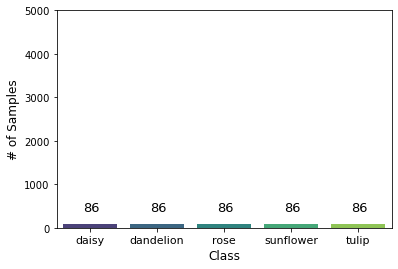

In [7]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1,2,3,4], ['daisy', 'dandelion','rose','sunflower','tulip'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

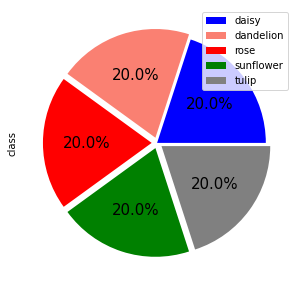

In [8]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['','','','',''], autopct='%1.1f%%', colors = ['blue','salmon','red','green','grey'],
explode = [0,0.05,0.05,0.05,0.05], textprops = {"fontsize":15})

plt.legend(labels=['daisy', 'dandelion','rose','sunflower','tulip'])
plt.show()

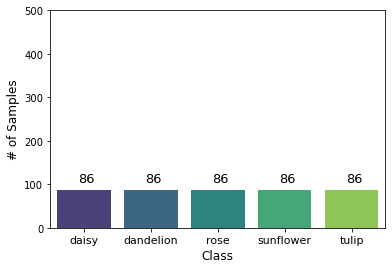

In [9]:
# Número de Classes - Rótulos
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1,2,3,4], ['daisy', 'dandelion','rose','sunflower','tulip'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

Image - Teste


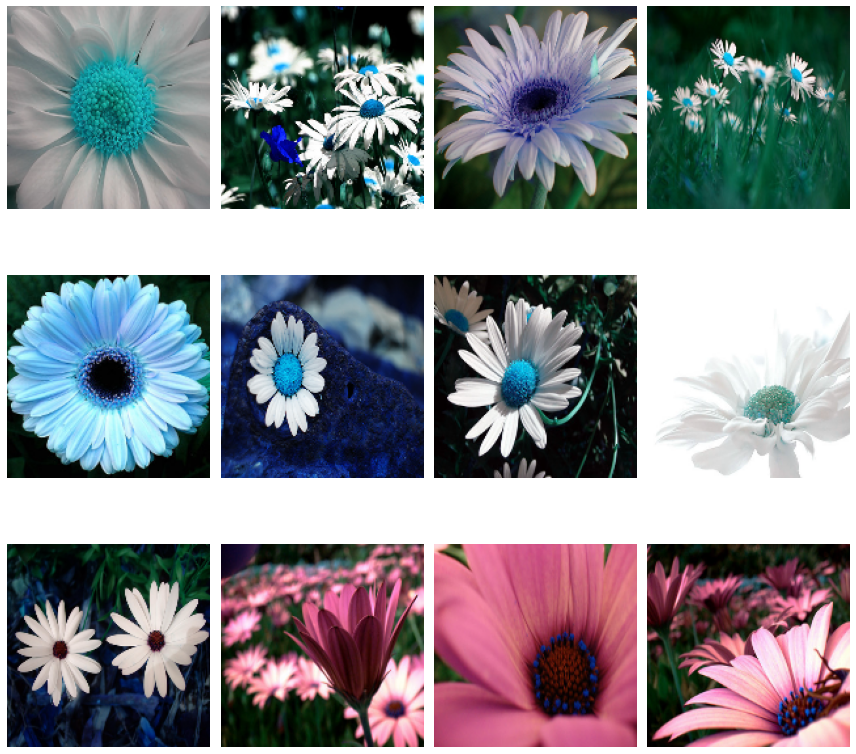

In [10]:
print('Image - Teste')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(df_test['image'][i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

# <a id="4">Preparando os dados</a> 

Será necessáro criar um conjunto de validação usando 70% para o treinamento e 30% para fins de validação.

In [11]:
train_df, val_df = train_test_split(df_train, test_size = 0.30, random_state = SEED, stratify = df_train['class'])

In [12]:
train_df

,class,image
301,sunflower,flowers/sunflower\200557981_f800fa1af9.jpg
182,rose,flowers/rose\145862135_ab710de93c_n.jpg
103,dandelion,flowers/dandelion\141652526_2be95f21c3_n.jpg
263,sunflower,flowers/sunflower\1064662314_c5a7891b9f_m.jpg
101,dandelion,flowers/dandelion\140951103_69847c0b7c.jpg
...,...,...
357,tulip,flowers/tulip\113960470_38fab8f2fb_m.jpg
343,sunflower,flowers/sunflower\969913643_9d5cd2fe45_m.jpg
76,daisy,flowers/daisy\676120388_28f03069c3.jpg
240,rose,flowers/rose\509239741_28e2cfe492_m.jpg


In [13]:
val_df

,class,image
23,daisy,flowers/daisy\158869618_f1a6704236_n.jpg
77,daisy,flowers/daisy\695778683_890c46ebac.jpg
321,sunflower,flowers/sunflower\29972905_4cc537ff4b_n.jpg
174,rose,flowers/rose\118974357_0faa23cce9_n.jpg
20,daisy,flowers/daisy\15207766_fc2f1d692c_n.jpg
...,...,...
282,sunflower,flowers/sunflower\164670176_9f5b9c7965.jpg
368,tulip,flowers/tulip\132538273_335240fe5b_n.jpg
243,rose,flowers/rose\515121050_dcb99890be.jpg
158,dandelion,flowers/dandelion\506659320_6fac46551e.jpg


carregar as imagens das pastas e prepará-las para alimentar nossos modelos.

Começamos definindo os geradores de dados. Com o Keras Image Data Generator, podemos redimensionar os valores de pixel e aplicar técnicas de transformação aleatória para aumento de dados em tempo real. Definimos dois geradores diferentes. O val_datagen é usado para simplesmente redimensionar os conjuntos de validação e teste. O train_datagen inclui algumas transformações para aumentar o conjunto de treino.

Aplicamos esses geradores em cada conjunto de dados usando o método flow_from_dataframe. Além das transformações definidas em cada gerador, as imagens também são redimensionadas com base no conjunto target_size.

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'categorical',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = 1,
                                            shuffle = False)

Found 301 validated image filenames belonging to 5 classes.
Found 129 validated image filenames belonging to 5 classes.
Found 430 validated image filenames belonging to 5 classes.


criação e treinamento dos modelos de classificação de imagens.

# <a id="5">CNN - Convolutional Neural Network</a>

Definição do Modelo

In [15]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Camadas Internas
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    #Camada de Saída
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [16]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.00003),  metrics='accuracy')

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 155, 155, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 153, 153, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 153, 153, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 153, 153, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 76, 76, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 76, 76, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)       

In [17]:
from keras.callbacks import ModelCheckpoint
# cria um checkpoint para salvar os pesos do melhor modelo encontrado no trainamento
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

# treina o modelo
          
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[checkpointer],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH))
       

Epoch 1/50
10/9 [===============================] - ETA: 0s - loss: 1.0911 - accuracy: 0.6465
Epoch 00001: val_loss improved from inf to 0.63429, saving model to model.weights.best.hdf5
10/9 [===============================] - 18s 2s/step - loss: 1.0911 - accuracy: 0.6465 - val_loss: 0.6343 - val_accuracy: 0.8000
Epoch 2/50
10/9 [===============================] - ETA: 0s - loss: 0.7072 - accuracy: 0.7681
Epoch 00002: val_loss did not improve from 0.63429
10/9 [===============================] - 14s 1s/step - loss: 0.7072 - accuracy: 0.7681 - val_loss: 0.6690 - val_accuracy: 0.8000
Epoch 3/50
10/9 [===============================] - ETA: 0s - loss: 0.6340 - accuracy: 0.6924
Epoch 00003: val_loss did not improve from 0.63429
10/9 [===============================] - 14s 1s/step - loss: 0.6340 - accuracy: 0.6924 - val_loss: 0.6627 - val_accuracy: 0.8000
Epoch 4/50
10/9 [===============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.7701
Epoch 00004: val_loss did not improve from 

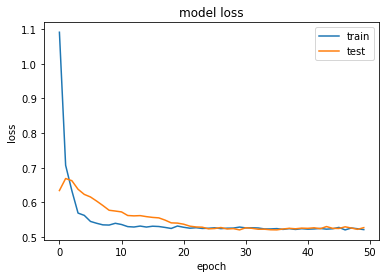

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

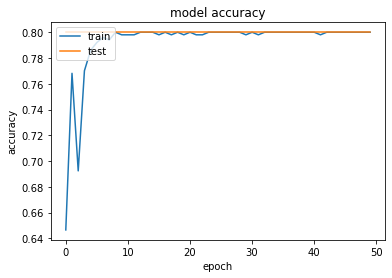

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# carrega os pesos do melhor modelo encontrado no treinamento
model.load_weights('model.weights.best.hdf5')

In [21]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.5207272171974182
Val accuracy: 0.800000011920929


In [22]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5208450555801392
Test accuracy: 0.7999984622001648


# <a id="6">Algoritmo de Deep Learning Transfer Learning</a> 

A Segundo Algoritmo é o tranfer Learning, consiste em usar um modelo pré-treinado como extrator de recursos. Neste notebook, o modelo selecionado foi o ResNet152V2 disponível no Pacote Keras
Este modelo já foi treinado em outro conjunto de dados (ImageNet). O que fazemos aqui é definir include_top como false, removendo o ‘head’, responsável por atribuir as classes neste outro conjunto de dados, e manter todas as camadas anteriores. Em seguida, incluímos nossas últimas camadas, incluindo a responsável por gerar a saída.


In [27]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [28]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.00005), metrics='accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [29]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[checkpointer],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
10/9 [===============================] - ETA: -1s - loss: 0.5788 - accuracy: 0.7502
Epoch 00001: val_loss did not improve from 0.51239
9/9 [==============================] - 48s 5s/step - loss: 0.5788 - accuracy: 0.7502 - val_loss: 0.5525 - val_accuracy: 0.7907
Epoch 2/50
10/9 [===============================] - ETA: -1s - loss: 0.5549 - accuracy: 0.7920
Epoch 00002: val_loss did not improve from 0.51239
9/9 [==============================] - 40s 4s/step - loss: 0.5549 - accuracy: 0.7920 - val_loss: 0.5389 - val_accuracy: 0.7907
Epoch 3/50
10/9 [===============================] - ETA: -1s - loss: 0.5422 - accuracy: 0.7900
Epoch 00003: val_loss did not improve from 0.51239
9/9 [==============================] - 40s 4s/step - loss: 0.5422 - accuracy: 0.7900 - val_loss: 0.5319 - val_accuracy: 0.7860
Epoch 4/50
10/9 [===============================] - ETA: -1s - loss: 0.5367 - accuracy: 0.7880
Epoch 00004: val_loss did not improve from 0.51239
9/9 [==============================

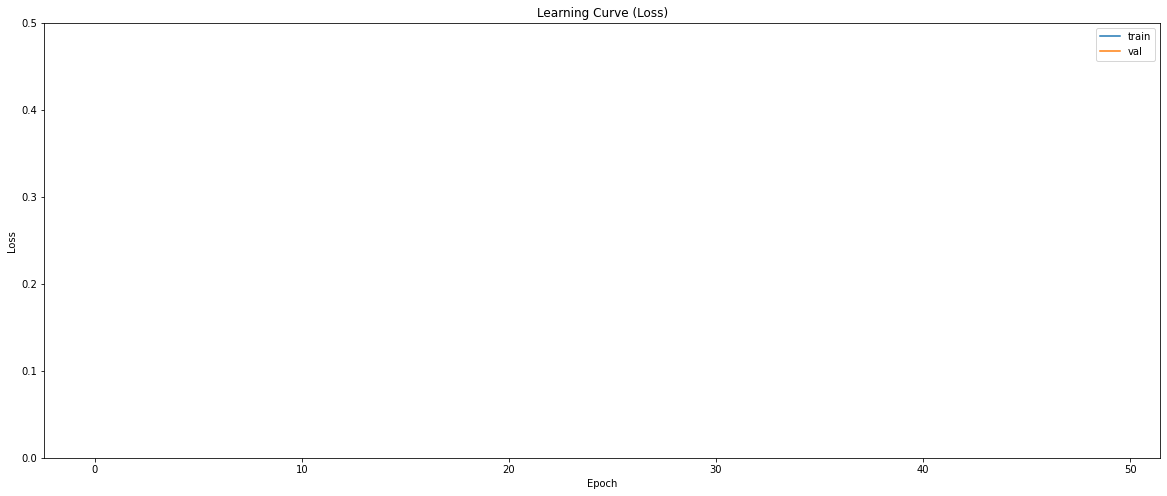

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

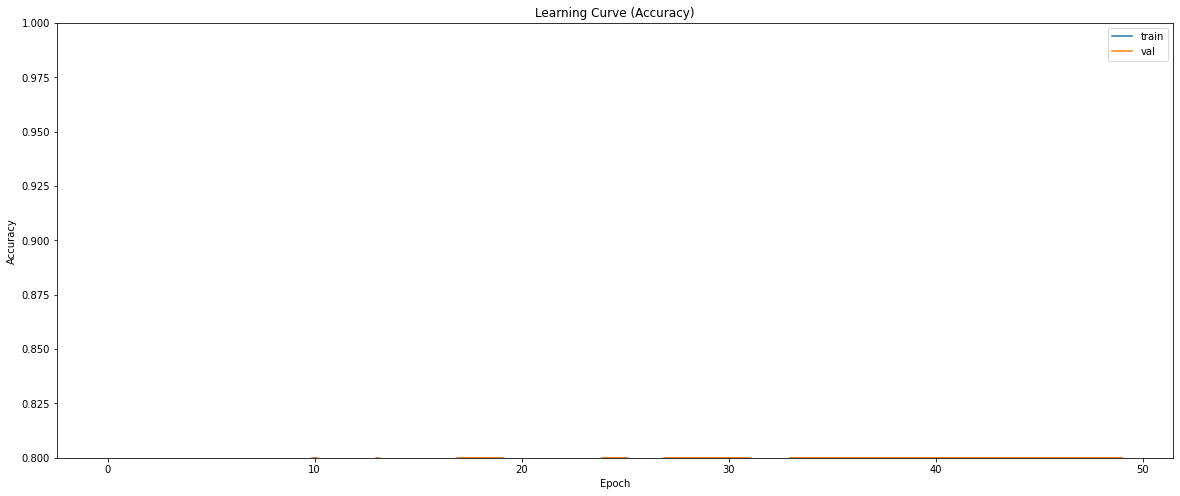

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [34]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.5120593905448914
Val accuracy: 0.7953488230705261


In [35]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5069136619567871
Test accuracy: 0.7986031174659729


# <a id="7">Fine Tuning</a> 

Our last approach is called Fine Tuning. In the last section, all the layers from the pretrained model were ‘frozen’, preserving the weights calculated during its training on the ImageNet dataset. Now, we are going to unfreeze a few of its last layers and continue the training, tuning the weights from these layers according to our dataset.

In [36]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [37]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [38]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.000002), metrics='accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [39]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[checkpointer],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
10/9 [===============================] - ETA: -1s - loss: 0.5403 - accuracy: 0.8000
Epoch 00001: val_loss did not improve from 0.51206
9/9 [==============================] - 52s 5s/step - loss: 0.5403 - accuracy: 0.8000 - val_loss: 0.5133 - val_accuracy: 0.7953
Epoch 2/50
10/9 [===============================] - ETA: -1s - loss: 0.5396 - accuracy: 0.8000
Epoch 00002: val_loss did not improve from 0.51206
9/9 [==============================] - 44s 5s/step - loss: 0.5396 - accuracy: 0.8000 - val_loss: 0.5148 - val_accuracy: 0.7953
Epoch 3/50
10/9 [===============================] - ETA: -2s - loss: 0.5339 - accuracy: 0.8000
Epoch 00003: val_loss did not improve from 0.51206
9/9 [==============================] - 48s 5s/step - loss: 0.5339 - accuracy: 0.8000 - val_loss: 0.5161 - val_accuracy: 0.7953
Epoch 4/50
10/9 [===============================] - ETA: -2s - loss: 0.5312 - accuracy: 0.8000
Epoch 00004: val_loss did not improve from 0.51206
9/9 [==============================

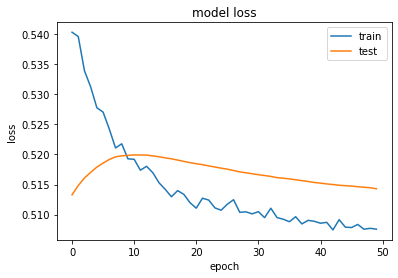

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

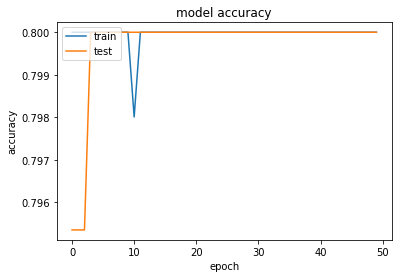

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.5143036246299744
Val accuracy: 0.800000011920929


In [45]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5100519061088562
Test accuracy: 0.7999984622001648


As expected, the fine-tuning approach has reached the best score. We end this notebook by showing a few performance metrics.

# <a id="8">Performance Metrics</a> 

In [47]:
num_label = {'daisy': 0, 'dandelion' : 1, 'rose' : 2,  'sunflower' : 3,  'tulip' : 4 }
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [48]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [49]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.2


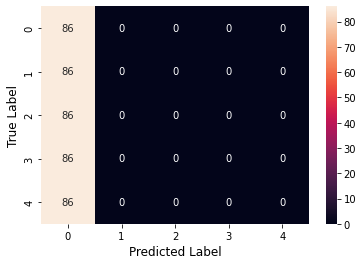

In [50]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [51]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        86
           1       0.00      0.00      0.00        86

   micro avg       0.20      0.50      0.29       172
   macro avg       0.10      0.50      0.17       172
weighted avg       0.10      0.50      0.17       172



The recall was close to 100%. Even without expertise on the medical field, it’s reasonable to assume that false negatives are more ‘costly’ than false positives in this case. Reaching such recall with a relatively small dataset for training as this one, while also reaching a pretty good recall, is a good indicative of the model’s capabilities. Such capabilities are also confirmed by the high ROC-AUC value.

# <a id="9">References</a> 

- https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
- https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb
- https://www.tensorflow.org/guide/keras/transfer_learning
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- https://keras.io/api/applications/
- https://keras.io/api/applications/resnet/#resnet152v2-function

## <center> If you find this notebook useful, support with an upvote! <center>